# CS 105 Mini Project

**Team**: Thomas Henningson, Josh Pennington, Suhail-Anand Dhilon, Cameron Tsai <br><br>

# Introduction

**Question 1**: What data do you have?

1. What is your cumulative GPA as of Winter 2022?
2. What was your GPA your very first quarter at UCR?
3. What is your gender?
4. How many STEM advanced classes did you take in high school (AP, IB, Honors, Dual-Enrollment, etc.)?
5. How many social studies/arts advanced classes did you take in high school (AP, IB, Honors, Dual-Enrollment, etc.)?
6. Rate the importance of your education in your life on a scale of 1-10
7. Rate the enjoyment/fufillment you receive from education on a scale of 1-10

**Question 2**: What would you like to know?

Does taking advanced courses in high school have a postive effect on student's grades, study habits, and outlook on education in college?

# Exploring the Data (Question 3)

First, we will remove all of the unnecessary rows for our question. We will clean the data when necessary

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
import seaborn as sns

data = pd.read_csv("CS105_Survey.csv")

inds = [1, 2, 3, 5, 6, 7, 9, 15, 16, 17, 18, 19, 20, 21, 23, 31, 32, 33, 43, 46, 48, 58, 59, 70, 75, 76, 77, 79]

data = data.iloc[:,inds]

data.to_csv("cleaned.csv")

Next, we wanted to know if our data could be biased in any way. One way in which our data is bias is clearly that all of the students who answered are taking computer science courses. However, another way in which they could be bias is through gender. Below is a pie chart of of the gender distribution of our data:

<AxesSubplot:ylabel='None'>

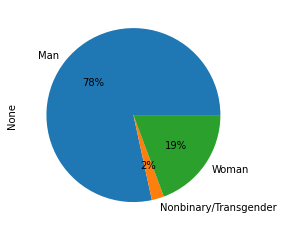

In [16]:
gender_data = data.replace("Non-binary/non-conforming", "Nonbinary/Transgender").replace("Transgender-Woman", "Nonbinary/Transgender")
gender_data.groupby("What gender do you identify as?").size().plot.pie(y='Gender Distribution', autopct='%.0f%%')

The results from our survey show that roughly 80% of all responses came from men. While not inherently a problem in the survey or questions, this distribution may not accurately represent the distribution for the population of all college students. Another problem that is that a confounding variable may be introduced in the form of gender. We can not be certain that gender plays a role in academic success. For example, the following stacked bar graph shows the distribution according to gender when it comes to first year GPA.

<AxesSubplot:xlabel='What was your approximate GPA for your first year at UCR?'>

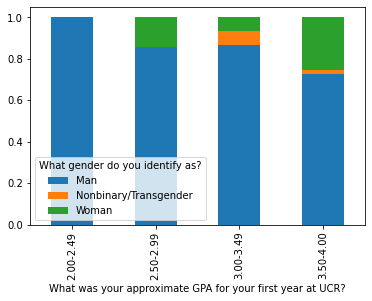

In [17]:
yearOneGPA = data.iloc[:,5].astype(float)

gender = data.iloc[:, 1].dropna().replace("Non-binary/non-conforming", "Nonbinary/Transgender").replace("Transgender-Woman", "Nonbinary/Transgender")
yearOneGPA = pd.cut(yearOneGPA,bins=[0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.1],labels=["0.00-0.49","0.50-0.99","1.00-1.49","1.50-1.99","2.00-2.49","2.50-2.99","3.00-3.49","3.50-4.00"],right=False) # bin the GPA's

df = pd.crosstab(gender, yearOneGPA)

gpa_counts = df.sum(axis= 0)
df = df.divide(gpa_counts, axis=1)

(df.T).plot.bar(stacked= True)

We note that this seems to indicate that Woman and Nonbinary/Transgender individuals may skew toward higher GPA, for whatever reason. This discrepancy could skew our results going forward. This is just one example of many variables that could confound our research, so it is good to keep that in mind going forward.

Next, we will look at the distributions between the number of advanced courses taken in high school to the the students first year GPA. We will use box plots to analyze this data. What we expect to see either wider ranging GPA distributions for smaller amounts of advanced courses taken, or smaller GPA averages/distributions.

<AxesSubplot:>

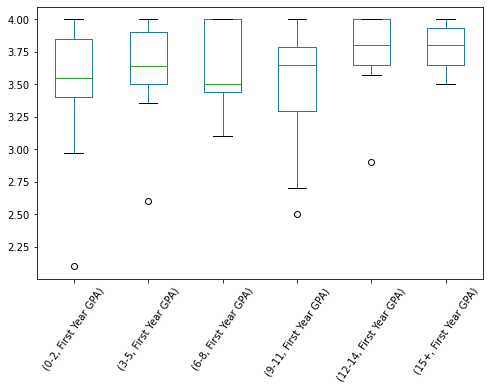

In [18]:
fyGPA_courses = data.iloc[:,[5,7,8]].dropna().replace("None", "0")

df = pd.DataFrame()
df["SumCourses"] = fyGPA_courses.iloc[:,1:3].astype(int).sum(axis=1)
df["SumCourses"] = pd.cut(df["SumCourses"],bins=[0,3,6,9,12,15,30],labels=["0-2","3-5","6-8","9-11","12-14","15+"],right=False)

df["First Year GPA"] = fyGPA_courses.iloc[:,0].astype(float)

df.groupby("SumCourses").boxplot(subplots=False,rot=55,figsize=(8,5),grid=False)

These bar charts were not quite what we were expecting, but still track along our general hypothesis. We can see that the average GPA is increasing, with the exception of the 6-8 courses bucket, which is what we expected to see. other than that, the distributions are all over the place, but it seems to be the case that the box plots get tighter and skew more toward the higher GPA's as we increase the number of classes taken. Additionally, there are less outliers for lower GPA's as we increase the number of advanced courses taken.

Now, we will do the same thing we did for the first year GPA, but with student's current GPA. We want to see if taking more advanced courses in high school may lead to a higher chance of maintaing a high GPA as college progresses. However, we do expect to see wider distributions and probably lower averages.

<AxesSubplot:>

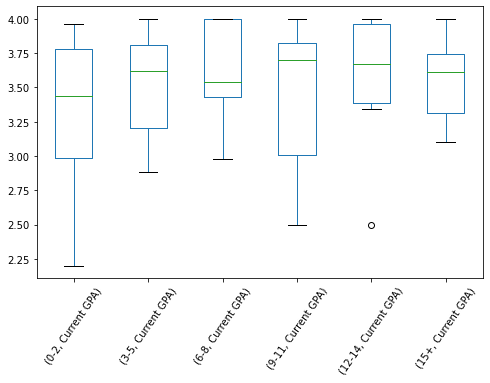

In [19]:
curGPA_courses = data.iloc[:,[3,7,8]].dropna().replace("None", "0")

df = pd.DataFrame()
df["SumCourses"] = curGPA_courses.iloc[:,1:3].astype(int).sum(axis=1)
df["SumCourses"] = pd.cut(df["SumCourses"],bins=[0,3,6,9,12,15,30],labels=["0-2","3-5","6-8","9-11","12-14","15+"],right=False)

df["Current GPA"] = curGPA_courses.iloc[:,0].astype(float)

df.groupby("SumCourses").boxplot(subplots=False,rot=55,figsize=(8,5),grid=False)

These box plots are very interesting. It seems to show that as college progresses, the number of advanced courses taken in high school starts to matter less. We can see that in the fact that the averages do not follow a pattern across the plots. As we predicted, the distributions also got longer and most of the outliers were removed. This means that students fell along their respective GPA distributions more uniformly than in their first year. This plot in particular would be evidence against our hypothesis, but it could be the case that as college progresses, more and more circumstances can start to affect your GPA, therefore, we find it prudent going forward that we analyze strictly first year GPA's in order to test out hypothesis.

Next, we wanted to answer some more questions related to our overarching question, since GPA is not the only indicator for success we wanted to look at. We also wanted to know whether taking more advanced courses in high school affects your outlook toward education in general, specifically the importance it has in a student's life and the enjoyment/fufillment they recieve from education. Below are two heatmaps showcasing these two variables:

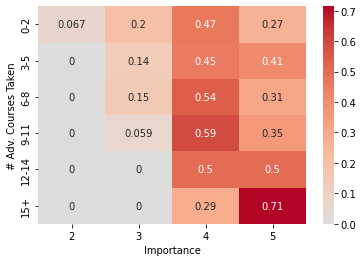

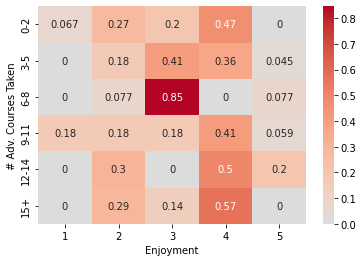

In [20]:
courses_importance = data.iloc[:,[7,8,10]].dropna().replace("None", "0") # get first year GPA and advanced courses

sumCourses = courses_importance.iloc[:,0:2].astype(int).sum(axis=1) # sum the two types of advanced courses
importance = courses_importance.iloc[:,2].astype(int) # get the importance of education

sumCourses = pd.cut(sumCourses,bins=[0,3,6,9,12,15,30],labels=["0-2","3-5","6-8","9-11","12-14","15+"],right=False) # bin the sums

table = pd.crosstab(sumCourses, importance, rownames=["# Adv. Courses Taken"], colnames=["Importance"]) # create the map
table = table.div(table.sum(axis=1), axis=0) # normalize across rows

# parameter "center" indicate the value at which to center the colormap when plotting divergant data.
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(table, center= 0, cmap = "coolwarm",annot= True)
plt.show()

courses_enjoyment = data.iloc[:,[7,8,11]].dropna().replace("None", "0") # get first year GPA and advanced courses

sumCourses = courses_enjoyment.iloc[:,0:2].astype(int).sum(axis=1) # sum the two types of advanced courses
enjoyment = courses_enjoyment.iloc[:,2].astype(int) # get the enjoyment of education

sumCourses = pd.cut(sumCourses,bins=[0,3,6,9,12,15,30],labels=["0-2","3-5","6-8","9-11","12-14","15+"],right=False) # bin the sums

table = pd.crosstab(sumCourses, enjoyment, rownames=["# Adv. Courses Taken"], colnames=["Enjoyment"]) # create the map
table = table.div(table.sum(axis=1), axis=0) # normalize across rows

sns.heatmap(table, center= 0, cmap = "coolwarm",annot= True)
plt.show()

According to these maps, it seems that the number of advanced courses you take in high school is an indicator of how important education is to you. However, it could be the case that the dependence is actually reversed. It might be that education IS important to you, so you chose to take more advanced courses in high school. We have no way of telling which one is true, but it seems to be the case that taking more advanced courses can teach an individual the importance of education.

It does not seem to be the case that the number of advanced courses indicates a person would get any more fulfillment or enjoyment out of education. It is generally true that most people surveyed seemed to be at about a 4/5 enjoyment, regardless of the number of courses taken (with the exception of 6-8 courses, which had many 3/5). This would indicate the number of courses has no effect on getting students to enjoy their education any more than they already do.

# Hypothesis Testing (Question 4 and 5)

The main question we want to answer for this mini project is whether or not taking advanced courses in high school prepares you for college or makes you more successful in college. Therefore, our main hypothesis is:

Taking advanced courses in high school leads to better academic performance in college.

In order to test this hypothesis, we will perform a correlation analysis on the total number of advanced courses taken in high school vs. the first year college GPA. After that, we will perform a chi-squared analysis on the same data. These two statistics should tell us whether there is statistical significance in the relationship between these two variables.

Lets start with the correlation analysis:

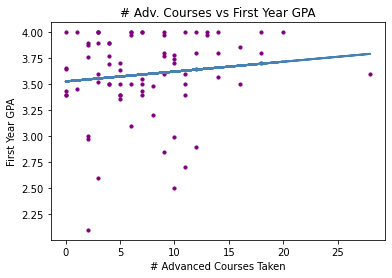

Correlation: 0.1301


In [21]:
gpa_courses = data.iloc[:,[5,7,8]].dropna().replace("None", "0") # get first year GPA and advanced courses

sumCourses = gpa_courses.iloc[:,1:3].astype(int).sum(axis=1) # sum the two types of advanced courses
yearOneGPA = gpa_courses.iloc[:,0].astype(float) # get the GPA's

a, b = np.polyfit(sumCourses, yearOneGPA, 1)

corr, extra = pearsonr(sumCourses, yearOneGPA)

plt.plot(sumCourses, a*sumCourses+b, color='steelblue', linewidth=2)
plt.scatter(sumCourses, yearOneGPA, s=10, c="purple")
plt.title("# Adv. Courses vs First Year GPA")
plt.xlabel("# Advanced Courses Taken")
plt.ylabel("First Year GPA")
plt.show()

print("Correlation:",round(corr,4))

As we can see, there is a weak positive correlation when it come to first year GPA and the number of advanced courses taken in high school. We expected this correlation to be higher, but it sufficies to say that these two variables are probably not independent. However, we can perform a statiscal test to see just how dependent first year college GPA is on the number of advanced courses taken in high school.

Now, we will look at the chi-squared test. We first seperate the data into useful buckets, then generate the chi-squared table. From there, we can use Python to find the statistic and p-value.

The null hypothesis for this test is: Taking more advanced courses in high school has no effect on first year college GPA.

In [22]:
sumCourses = pd.cut(sumCourses,bins=[0,3,6,9,12,15,30],labels=["0-2","3-5","6-8","9-11","12-14","15+"],right=False) # bin the sums

yearOneGPA = pd.cut(yearOneGPA,bins=[0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.1],labels=["0.00-0.49","0.50-0.99","1.00-1.49","1.50-1.99","2.00-2.49","2.50-2.99","3.00-3.49","3.50-4.00"],right=False) # bin the GPA's

table = pd.crosstab(sumCourses, yearOneGPA, rownames=["# Adv. Courses"], colnames=["First Year GPA"]) # create the chi-squared table
c, p, dof, expected = chi2_contingency(table) # perform chi-squared

# Show results
display(table)
print("Chi-Squared Statistic:", round(c, 2))
print("p-value:", round(p, 4))

First Year GPA,2.00-2.49,2.50-2.99,3.00-3.49,3.50-4.00
# Adv. Courses,,,,
0-2,1,1,5,7
3-5,0,1,3,15
6-8,0,0,5,8
9-11,0,4,1,11
12-14,0,1,0,8
15+,0,0,0,7


Chi-Squared Statistic: 23.4
p-value: 0.076


Here is our chi-squared table. One interesting thing to note is that the table takes on a sort of triangluar shape, where the higher the number of classes taken the more 0's you see for lower GPA buckets. This indicates, again, that first year college GPA may be dependent on the number of advanced classes taken in high school. As you can see, the chi-squared statsitic is 23.4. With the number of degrees of freedom in this table (15), we get a p value of 0.076. These means that if we reject the null hypothesis, we have a 7.6% chance of being incorrect. Those are pretty low odds, so we will conclude from our research that taking more advanced courses in high school will improve one's chances of doing well, academically, in college.

As our next hypothesis, due to the nature of the importance heatmap seeming like there was a relationship, we will perform another chi-squared analysis on the number of courses to importance of education to see if these two variables are significantly dependent on each other.

The null hypothesis for this test is: Taking more advanced courses in high school has no effect on the rating of the importance of education for a student.

In [23]:
courses_importance = data.iloc[:,[7,8,10]].dropna().replace("None", "0") # get first year GPA and advanced courses

sumCourses = courses_importance.iloc[:,0:2].astype(int).sum(axis=1) # sum the two types of advanced courses
sumCourses = pd.cut(sumCourses,bins=[0,3,6,9,12,15,30],labels=["0-2","3-5","6-8","9-11","12-14","15+"],right=False) # bin the sums

importance = courses_importance.iloc[:,2].astype(int) # get the importance of education

table = pd.crosstab(sumCourses, importance, rownames=["# Adv. Courses"], colnames=["Importance"]) # create the chi-squared table
c, p, dof, expected = chi2_contingency(table) # perform chi-squared

# Show results
display(table)
print("Chi-Squared Statistic:", round(c, 2))
print("p-value:", round(p, 4))

Importance,2,3,4,5
# Adv. Courses,,,,
0-2,1,3,7,4
3-5,0,3,10,9
6-8,0,2,7,4
9-11,0,1,10,6
12-14,0,0,5,5
15+,0,0,2,5


Chi-Squared Statistic: 12.58
p-value: 0.635


This time, the chi-squared statsitic is 12.58. With the number of degrees of freedom in this table (15), we get a p value of 0.635. These means that if we reject the null hypothesis, we have a 63.5% chance of being incorrect. This would seem to indicate that we should not reject the null hypothesis, and conclude that taking more advanced courses in high school has no effect on the rating of the importance of education for a student. It seems that the heatmap from before was misleading.

As our last hypothesis, we will perform another chi-squared analysis on the number of courses to enjoymen of education to see if these two variables are significantly dependent on each other.

The null hypothesis for this test is: Taking more advanced courses in high school has no effect on the rating of the enjoyment of education for a student.

In [24]:
courses_importance = data.iloc[:,[7,8,11]].dropna().replace("None", "0") # get first year GPA and advanced courses

sumCourses = courses_importance.iloc[:,0:2].astype(int).sum(axis=1) # sum the two types of advanced courses
sumCourses = pd.cut(sumCourses,bins=[0,3,6,9,12,15,30],labels=["0-2","3-5","6-8","9-11","12-14","15+"],right=False) # bin the sums

importance = courses_importance.iloc[:,2].astype(int) # get the importance of education

table = pd.crosstab(sumCourses, importance, rownames=["# Adv. Courses"], colnames=["Enjoyment"]) # create the chi-squared table
c, p, dof, expected = chi2_contingency(table) # perform chi-squared

# Show results
display(table)
print("Chi-Squared Statistic:", round(c, 2))
print("p-value:", round(p, 4))
print(dof)

Enjoyment,1,2,3,4,5
# Adv. Courses,,,,,
0-2,1,4,3,7,0
3-5,0,4,9,8,1
6-8,0,1,11,0,1
9-11,3,3,3,7,1
12-14,0,3,0,5,2
15+,0,2,1,4,0


Chi-Squared Statistic: 39.29
p-value: 0.0061
20


This time, the chi-squared statsitic is 39.29. With the number of degrees of freedom in this table (20), we get a p value of 0.0061. These means that if we reject the null hypothesis, we have a 0.61% chance of being incorrect. This would seem to indicate that we should reject the null hypothesis, and conclude that taking more advanced courses in high school has no effect on the rating of the enjoymen of education for a student. However, we do not think this is actually the case, because there is a huge outlier of 3 enjoyment for 6-8 courses. This can skew the chi-square analysis since there is a huge discrepency between observed and expected values for this outlier.